![example](images/director_shot.jpeg)

# Microsoft Movie Analysis
***
**Author:** <span style='color:Blue'> Aswathi Sasikumar.  </span>

## Overview
--------------
<span style='font-family:Helvetica'>
This project analyzes the types of movies that are currently doing the best at the box office.This will help Microsoft in understanding that the current trends in Movie Market and will enable them to decide upon the movies for their New Movie Studio.    
    
</span>

## Business Problem
--------------------
<span style='font-family:Helvetica'>
Microsoft will be able to finalize their decision on the type of movies to be created based on the current trends in box office by analysing the movies and genres with highest trends.

The datasets from the popular movie datasets were analysed.
   * <a href="https://www.imdb.com/">IMDB</a>
   * <a href="https://www.boxofficemojo.com/">BOX Office MOJO</a>
    
By analysing the ratings,votes given and the gross income gained we will be able to understand the latest movie trends.
</span>

## Data Understanding
---
<span style='font-family:Helvetica'>
IMDb is the world's most popular and authoritative source for movie, TV and celebrity content.One can find in it ratings and reviews for the newest movie and TV shows.IMDB dataset contains rating and number of votes given to each movie.

    
    
Box Office Mojo is an American website that tracks box-office revenue in a systematic, algorithmic way.</span>

In [1]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer as countVectorizer

%matplotlib inline

In [2]:
# Here you run your code to explore the data
imdb_basics_df = pd.read_csv('../Microsoft-Movie-Analysis/data/zippedData/imdb.title.basics.csv.gz', compression='gzip', 
                                 header=0, sep=',', quotechar='"')
imdb_ratings_df = pd.read_csv('../Microsoft-Movie-Analysis/data/zippedData/imdb.title.ratings.csv.gz', compression='gzip', 
                                 header=0, sep=',', quotechar='"')
bom_gross_df = pd.read_csv('../Microsoft-Movie-Analysis/data/zippedData/bom.movie_gross.csv.gz', compression='gzip', 
                                 header=0, sep=',', quotechar='"')

In [3]:
imdb_basics_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [4]:
imdb_ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


## IMDB Basics data set

<span style='font-family:Helvetica'>IMDB Basics data set contains movie records of the period 2010-2115.Each movie is identified by an index "tconst".The genres type classification of the movies is also stored in it.</span>

In [5]:
imdb_basics_df.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


## IMDB Ratings data set

<span style='font-family:Helvetica'>IMDB Ratings data set contains the average ratings and number of votes of each title present in IMDB data set.Thus IMDB Basics dataset and IMDB ratings table are related.</span>

In [6]:
imdb_ratings_df.head()

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


## Data Preparation

<span style='font-family:Helvetica'>Since IMDB.titles.Basics and IMDB.titles.Ratings are related we may merge the tables so to get the rating associated with movies stored in IMDB.titles.Basics dataset.There are 146,144 entries in IMDB.titles.Basics dataset but only 73,856 in IMDB.titles.Ratings dataset.It is found that IMDB.titles.Basics dataset contains movies that are yet to be released.Also whi;le analsying both tables it is found that only movies released till 2019 have rating.Since average rating and numvotes is essential for our data analysis we may consider only 73,856 records obtained by merging the two data sets.</span>

In [7]:
#IMDB.title.basics table contains movies that are yet to be released.
imdb_basics_df.sort_values(["start_year"],ascending=False).head(5)

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
89506,tt5174640,100 Years,100 Years,2115,NaN,Drama
96592,tt5637536,Avatar 5,Avatar 5,2027,NaN,"Action,Adventure,Fantasy"
2949,tt10300398,Untitled Star Wars Film,Untitled Star Wars Film,2026,NaN,Fantasy
52213,tt3095356,Avatar 4,Avatar 4,2025,NaN,"Action,Adventure,Fantasy"
105187,tt6149054,Fantastic Beasts and Where to Find Them 5,Fantastic Beasts and Where to Find Them 5,2024,NaN,"Adventure,Family,Fantasy"


In [8]:
# Movie records in IMDB.titles.Basics which has no corresponding values 
#(ie.,rating and number of votes in IMDB.titles.ratings table)
df=imdb_basics_df.merge(imdb_ratings_df, how = 'outer' ,indicator=True).loc[lambda x : x['_merge']=='left_only']
print(df.isnull().sum())
df.describe()

tconst                 0
primary_title          0
original_title        21
start_year             0
runtime_minutes    24119
genres              4604
averagerating      72288
numvotes           72288
_merge                 0
dtype: int64


,start_year,runtime_minutes,averagerating,numvotes
count,72288.000000,48169.000000,0.0,0.0
mean,2014.974961,74.544769,NaN,NaN
std,2.806210,75.355311,NaN,NaN
min,2010.000000,1.000000,NaN,NaN
25%,2013.000000,54.000000,NaN,NaN
50%,2015.000000,73.000000,NaN,NaN
75%,2017.000000,90.000000,NaN,NaN
max,2115.000000,6017.000000,NaN,NaN


In [9]:
# Merging datasets
imdb_merged = pd.merge(imdb_basics_df,imdb_ratings_df)
imdb_merged.info() 


<class 'pandas.core.frame.DataFrame'>
Int64Index: 73856 entries, 0 to 73855
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tconst           73856 non-null  object 
 1   primary_title    73856 non-null  object 
 2   original_title   73856 non-null  object 
 3   start_year       73856 non-null  int64  
 4   runtime_minutes  66236 non-null  float64
 5   genres           73052 non-null  object 
 6   averagerating    73856 non-null  float64
 7   numvotes         73856 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 5.1+ MB


In [13]:
#To find null values in the merged data
imdb_merged.isnull().sum()
len(imdb_merged)


73856

<span style='font-family:Helvetica'>Missing values are present in runtime_minutes column and genres column.Percentage of missing values were calculated as below.</span>

In [14]:
#To find the percentage of null values
percent_missing_values = ((imdb_merged.isnull().sum())/len(imdb_merged))*100
percent_missing_values 

tconst              0.000000
primary_title       0.000000
original_title      0.000000
start_year          0.000000
runtime_minutes    10.317374
genres              1.088605
averagerating       0.000000
numvotes            0.000000
dtype: float64

In [15]:
#To remove the rows with null values in runtime_minutes column and genres column
imdb_merged=imdb_merged.dropna()
imdb_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65720 entries, 0 to 73855
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tconst           65720 non-null  object 
 1   primary_title    65720 non-null  object 
 2   original_title   65720 non-null  object 
 3   start_year       65720 non-null  int64  
 4   runtime_minutes  65720 non-null  float64
 5   genres           65720 non-null  object 
 6   averagerating    65720 non-null  float64
 7   numvotes         65720 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 4.5+ MB


In [17]:
temp = imdb_merged.genres.dropna()
vec = countVectorizer(token_pattern='(?u)\\b[\\w-]+\\b', analyzer='word').fit(temp)
bag_of_genres = vec.transform(temp)
unique_genres =  vec.get_feature_names()
genres_Array=np.array(unique_genres)
genres_Array

array(['action', 'adult', 'adventure', 'animation', 'biography', 'comedy',
       'crime', 'documentary', 'drama', 'family', 'fantasy', 'game-show',
       'history', 'horror', 'music', 'musical', 'mystery', 'news',
       'reality-tv', 'romance', 'sci-fi', 'short', 'sport', 'thriller',
       'war', 'western'], dtype='<U11')

Number of movies based on genres
action: 6297
adult: 2
adventure: 3621
animation: 1615
biography: 3693
comedy: 15514
crime: 4338
documentary: 16423
drama: 28394
family: 3231
fantasy: 1969
game-show: 2
history: 2704
horror: 6917
music: 2438
musical: 638
mystery: 2889
news: 575
reality-tv: 13
romance: 5976
sci-fi: 2048
short: 1
sport: 1099
thriller: 7583
war: 795
western: 256


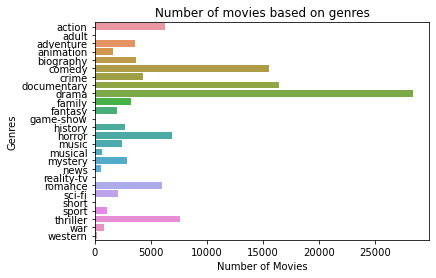

In [81]:
# Distribution of no of titles based on genres
count= {}
print("Number of movies based on genres")
for genres in genres_Array:
   print(genres + ":" ,len(imdb_merged[imdb_merged["genres"].str.contains(genres,case=False)]))
   temp=genres + ":" ,len(imdb_merged[imdb_merged["genres"].str.contains(genres,case=False)])
   count[genres]=len(imdb_merged[imdb_merged["genres"].str.contains(genres,case=False)])


names = list(count.keys())
values = list(count.values())
sns.barplot(x=values,y=names)
plt.xlabel("Number of Movies")
plt.ylabel("Genres")
plt.title("Number of movies based on genres")
plt.show()

## Data Modeling
Describe and justify the process for analyzing or modeling the data.

***
Questions to consider:
* How did you analyze or model the data?
* How did you iterate on your initial approach to make it better?
* Why are these choices appropriate given the data and the business problem?
***

In [ ]:
# Here you run your code to model the data

#imdb_merged.sort_values(["start_year","numvotes"],ascending=False).head(5)
#x=imdb_merged.groupby(["start_year"])["numvotes"].nlargest(5).reset_index()
#x


       

In [103]:
# To get 5 top voted movies and genres in each year for the period 2010-2019

year_val = sorted(imdb_merged["start_year"].unique())
grouped = imdb_merged.groupby(["start_year"])

for year in year_val:
    df_new=grouped.get_group(year)
    display(df_new.nlargest(5,"numvotes").set_index("tconst"))


,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
tconst,,,,,,,
tt1375666,Inception,Inception,2010,148.0,"Action,Adventure,Sci-Fi",8.8,1841066
tt1130884,Shutter Island,Shutter Island,2010,138.0,"Mystery,Thriller",8.1,1005960
tt0435761,Toy Story 3,Toy Story 3,2010,103.0,"Adventure,Animation,Comedy",8.3,682218
tt1228705,Iron Man 2,Iron Man 2,2010,124.0,"Action,Adventure,Sci-Fi",7.0,657690
tt0947798,Black Swan,Black Swan,2010,108.0,"Drama,Thriller",8.0,648854


,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
tconst,,,,,,,
tt1201607,Harry Potter and the Deathly Hallows: Part 2,Harry Potter and the Deathly Hallows: Part 2,2011,130.0,"Adventure,Drama,Fantasy",8.1,691835
tt0800369,Thor,Thor,2011,115.0,"Action,Adventure,Fantasy",7.0,683264
tt1675434,The Intouchables,Intouchables,2011,112.0,"Biography,Comedy,Drama",8.5,677343
tt0458339,Captain America: The First Avenger,Captain America: The First Avenger,2011,124.0,"Action,Adventure,Sci-Fi",6.9,668137
tt1270798,X-Men: First Class,X: First Class,2011,131.0,"Action,Adventure,Sci-Fi",7.7,608930


,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
tconst,,,,,,,
tt1345836,The Dark Knight Rises,The Dark Knight Rises,2012,164.0,"Action,Thriller",8.4,1387769
tt1853728,Django Unchained,Django Unchained,2012,165.0,"Drama,Western",8.4,1211405
tt0848228,The Avengers,The Avengers,2012,143.0,"Action,Adventure,Sci-Fi",8.1,1183655
tt1392170,The Hunger Games,The Hunger Games,2012,142.0,"Action,Adventure,Sci-Fi",7.2,795227
tt0903624,The Hobbit: An Unexpected Journey,The Hobbit: An Unexpected Journey,2012,169.0,"Adventure,Family,Fantasy",7.9,719629


,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
tconst,,,,,,,
tt0993846,The Wolf of Wall Street,The Wolf of Wall Street,2013,180.0,"Biography,Crime,Drama",8.2,1035358
tt1454468,Gravity,Gravity,2013,91.0,"Drama,Sci-Fi,Thriller",7.7,710018
tt1300854,Iron Man 3,Iron Man Three,2013,130.0,"Action,Adventure,Sci-Fi",7.2,692794
tt0770828,Man of Steel,Man of Steel,2013,143.0,"Action,Adventure,Sci-Fi",7.1,647288
tt2024544,12 Years a Slave,12 Years a Slave,2013,134.0,"Biography,Drama,History",8.1,577301


,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
tconst,,,,,,,
tt0816692,Interstellar,Interstellar,2014,169.0,"Adventure,Drama,Sci-Fi",8.6,1299334
tt2015381,Guardians of the Galaxy,Guardians of the Galaxy,2014,121.0,"Action,Adventure,Comedy",8.1,948394
tt2267998,Gone Girl,Gone Girl,2014,149.0,"Drama,Mystery,Thriller",8.1,761592
tt1843866,Captain America: The Winter Soldier,Captain America: The Winter Soldier,2014,136.0,"Action,Adventure,Sci-Fi",7.8,666252
tt2278388,The Grand Budapest Hotel,The Grand Budapest Hotel,2014,99.0,"Adventure,Comedy,Crime",8.1,633604


,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
tconst,,,,,,,
tt2488496,Star Wars: Episode VII - The Force Awakens,Star Wars: Episode VII - The Force Awakens,2015,136.0,"Action,Adventure,Fantasy",8.0,784780
tt1392190,Mad Max: Fury Road,Mad Max: Fury Road,2015,120.0,"Action,Adventure,Sci-Fi",8.1,780910
tt3659388,The Martian,The Martian,2015,144.0,"Adventure,Drama,Sci-Fi",8.0,680116
tt2395427,Avengers: Age of Ultron,Avengers: Age of Ultron,2015,141.0,"Action,Adventure,Sci-Fi",7.3,665594
tt1663202,The Revenant,The Revenant,2015,156.0,"Action,Adventure,Biography",8.0,621193


,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
tconst,,,,,,,
tt1431045,Deadpool,Deadpool,2016,108.0,"Action,Adventure,Comedy",8.0,820847
tt3498820,Captain America: Civil War,Captain America: Civil War,2016,147.0,"Action,Adventure,Sci-Fi",7.8,583507
tt2975590,Batman v Superman: Dawn of Justice,Batman v Superman: Dawn of Justice,2016,151.0,"Action,Adventure,Fantasy",6.5,576909
tt1386697,Suicide Squad,Suicide Squad,2016,123.0,"Action,Adventure,Fantasy",6.0,533039
tt2543164,Arrival,Arrival,2016,116.0,"Drama,Mystery,Sci-Fi",7.9,515483


,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
tconst,,,,,,,
tt3315342,Logan,Logan,2017,137.0,"Action,Drama,Sci-Fi",8.1,560270
tt0451279,Wonder Woman,Wonder Woman,2017,141.0,"Action,Adventure,Fantasy",7.5,487527
tt3501632,Thor: Ragnarok,Thor: Ragnarok,2017,130.0,"Action,Adventure,Comedy",7.9,482995
tt3896198,Guardians of the Galaxy Vol. 2,Guardians of the Galaxy Vol. 2,2017,136.0,"Action,Adventure,Comedy",7.7,482917
tt5013056,Dunkirk,Dunkirk,2017,106.0,"Action,Drama,History",7.9,466580


,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
tconst,,,,,,,
tt4154756,Avengers: Infinity War,Avengers: Infinity War,2018,149.0,"Action,Adventure,Sci-Fi",8.5,670926
tt1825683,Black Panther,Black Panther,2018,134.0,"Action,Adventure,Sci-Fi",7.3,516148
tt5463162,Deadpool 2,Deadpool 2,2018,119.0,"Action,Adventure,Comedy",7.8,391735
tt1727824,Bohemian Rhapsody,Bohemian Rhapsody,2018,134.0,"Biography,Drama,Music",8.0,345466
tt6644200,A Quiet Place,A Quiet Place,2018,90.0,"Drama,Horror,Sci-Fi",7.6,305031


,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
tconst,,,,,,,
tt4154796,Avengers: Endgame,Avengers: Endgame,2019,181.0,"Action,Adventure,Sci-Fi",8.8,441135
tt4154664,Captain Marvel,Captain Marvel,2019,123.0,"Action,Adventure,Sci-Fi",7.0,296225
tt6823368,Glass,Glass,2019,129.0,"Drama,Sci-Fi,Thriller",6.8,133793
tt0448115,Shazam!,Shazam!,2019,132.0,"Action,Adventure,Comedy",7.4,109051
tt6857112,Us,Us,2019,116.0,"Horror,Mystery,Thriller",7.1,102511


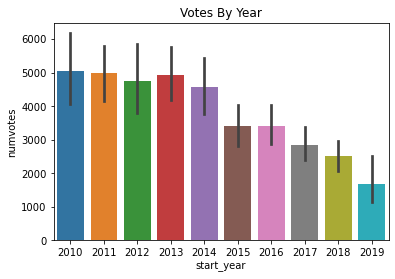

In [85]:
sns.barplot(x="start_year",y="numvotes",data = imdb_merged)
plt.title("Votes By Year")
plt.show()

## Conclusions
Provide your conclusions about the work you've done, including any limitations or next steps.

***
Questions to consider:
* What would you recommend the business do as a result of this work?
* What are some reasons why your analysis might not fully solve the business problem?
* What else could you do in the future to improve this project?
***